In [1]:
'''
2021/9/23
本代码计算并绘制孟湾判定区域的上层温度时间序列
'''
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *

In [2]:
f1  =  xr.open_dataset("/home/sun/qomo-data/zhuang_plev/plev_con_T.nc")
f2  =  xr.open_dataset("/home/sun/qomo-data/zhuang_plev/plev_ic_T.nc")
f3  =  xr.open_dataset("/home/sun/qomo-data/zhuang_plev/plev_id_T.nc")
f4  =  xr.open_dataset("/home/sun/qomo-data/zhuang_plev/plev_icid_T.nc")
def select_target(array,lats,lons,levs):
    return array.sel(lat=lats,lon=lons,lev=levs).T
lat_slice  =  slice(5,15)
lon_slice  =  slice(90,100)
lev_slice  =  slice(500,200)

In [3]:
t1  =  select_target(f1,lat_slice,lon_slice,lev_slice)
t2  =  select_target(f2,lat_slice,lon_slice,lev_slice)
t3  =  select_target(f3,lat_slice,lon_slice,lev_slice)
t4  =  select_target(f4,lat_slice,lon_slice,lev_slice)

In [4]:
def cal_average_upper_gradient(array):
    a_lon  =  np.average(array,axis=3)
    a_lev  =  np.average(a_lon,axis=1)
    a3     =  a_lev[:,10]-a_lev[:,0]
    return a3

t1_a  =  cal_average_upper_gradient(t1)
t2_a  =  cal_average_upper_gradient(t2)
t3_a  =  cal_average_upper_gradient(t3)
t4_a  =  cal_average_upper_gradient(t4)

## 接下来绘制折线图

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

x_tick_labels = []
for dddd in range(60, 140, 10):
    x_tick_labels.append(out_date(1981, dddd))

In [6]:
fig, ax = plt.subplots()

<ipython-input-7-2f64e41521e1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels)


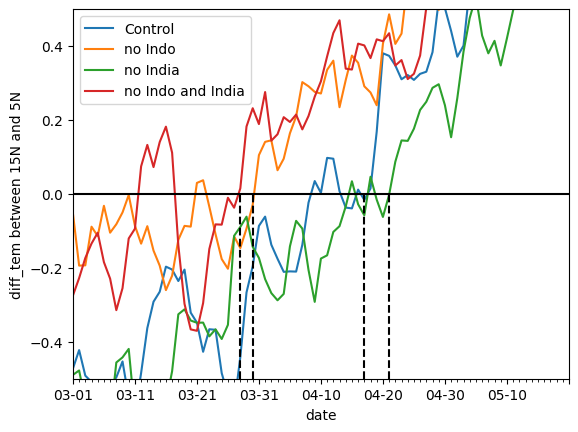

In [7]:
time  =  np.linspace(1,365,365)
# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(time, t1_a, label='Control')
line2, = ax.plot(time, t2_a, label='no Indo')
line3, = ax.plot(time, t3_a, label='no India')
line4, = ax.plot(time, t4_a, label='no Indo and India')

ax.plot([60,140],[0,0],c='black')
ax.plot([87,87],[-0.5,0],'--',color='k')
ax.plot([89,89],[-0.5,0],'--',color='k')
ax.plot([107,107],[-0.5,0],'--',color='k')
ax.plot([111,111],[-0.5,0],'--',color='k')
ax.legend()
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.set_xticklabels(x_tick_labels)
ax.set_xlim(xmin=60,xmax=140)
ax.set_ylim(ymin=-0.5,ymax=0.5)
ax.set_xlabel('date')
ax.set_ylabel('diff_tem between 15N and 5N')

plt.savefig('/home/sun/'+"upper_tem.pdf", bbox_inches='tight')
plt.show()

In [20]:
print(line1)

Line2D(Control)


In [21]:
ax.plot(time, t1_a, label='Control')